<a href="https://colab.research.google.com/github/farhannaushad08/Deep-Learning-Journey/blob/main/CNN_03_Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing dataset from kaggle**

In [3]:
import os
import zipfile

os.makedirs("/root/.kaggle", exist_ok=True)

!mv kaggle.json /root/.kaggle/

!chmod 600 /root/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 55% 120M/218M [00:00<00:00, 1.23GB/s]
100% 218M/218M [00:00<00:00, 637MB/s] 


**Extract zip file**

In [5]:
import zipfile
with zipfile.ZipFile("cat-and-dog.zip", "r") as zip_ref:
    zip_ref.extractall("cat_and_dog_data")

**Importing essential library**

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras import layers

**Load the data using generator**

In [7]:
train_dir = "/content/cat_and_dog_data/training_set/training_set"
test_dir = "/content/cat_and_dog_data/test_set/test_set"

# Load training set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),   # resize images
    batch_size=32,
    label_mode="binary"      # 0 = cat, 1 = dog
)

# Load test set
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


In [8]:
train_cats = 0
train_dogs = 0

# Count in training dataset
for images, labels in train_ds:
    train_cats += tf.reduce_sum(1 - labels).numpy()  # label 0 = cat
    train_dogs += tf.reduce_sum(labels).numpy()      # label 1 = dog

test_cats = 0
test_dogs = 0

# Count in test dataset
for images, labels in test_ds:
    test_cats += tf.reduce_sum(1 - labels).numpy()
    test_dogs += tf.reduce_sum(labels).numpy()

print("📊 Training set:")
print(f"  Cats: {int(train_cats)}")
print(f"  Dogs: {int(train_dogs)}")

print("\n📊 Test set:")
print(f"  Cats: {int(test_cats)}")
print(f"  Dogs: {int(test_dogs)}")


📊 Training set:
  Cats: 4000
  Dogs: 4005

📊 Test set:
  Cats: 1011
  Dogs: 1012


**Normalize the the data between 0 and 1**

In [9]:
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

**BASELINE CNN MODEL**

In [10]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))   # helps prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # binary classification

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Training cnn model on train set**

In [13]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.5050 - loss: 0.7690 - val_accuracy: 0.5037 - val_loss: 0.7036
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.5354 - loss: 0.6901 - val_accuracy: 0.6767 - val_loss: 0.6138
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.6691 - loss: 0.6189 - val_accuracy: 0.7237 - val_loss: 0.5763
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.7226 - loss: 0.5470 - val_accuracy: 0.7657 - val_loss: 0.5049
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.7601 - loss: 0.4866 - val_accuracy: 0.7711 - val_loss: 0.4913
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.7974 - loss: 0.4429 - val_accuracy: 0.7696 - val_loss: 0.4901
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.8183 - loss: 0.3992 - val_accuracy: 0.7800 - val_loss: 0.4669
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.8435 - loss: 0.3444 - v

**Evaluate**

In [14]:
loss, acc = model.evaluate(test_ds)
print(f"Test Accuracy: {acc*100:.2f}%")

64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7992 - loss: 0.4937
Test Accuracy: 80.18%


**Plotting model perfromance**

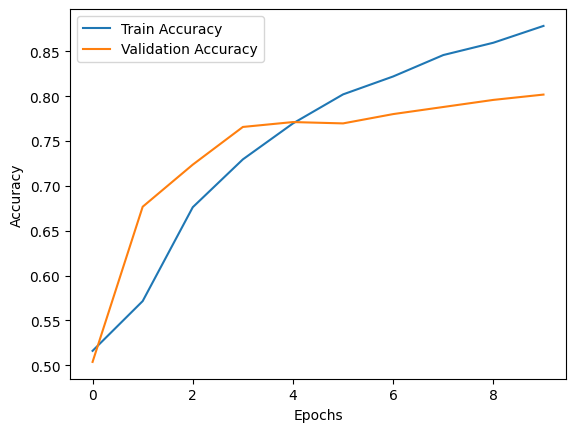

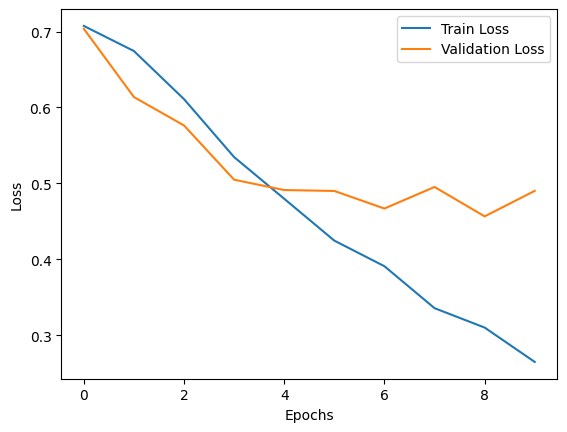

In [15]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


As you can see model overfit, it will give more accuracy on train set but doest improve on test set.

To reduce overfitting we can do:-

*   Add More Data

*   Data Augumentation

*   L1/L2 Regularizer
*   Dropout


*   Batch Normalization


*   Reduce Complexity



## **Trying another cnn architecture for better result using 4 Convolutional layers with increasing filters**








Epoch 1/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.5176 - loss: 0.6914 - val_accuracy: 0.5872 - val_loss: 0.6800
Epoch 2/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.5832 - loss: 0.6717 - val_accuracy: 0.6387 - val_loss: 0.6389
Epoch 3/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.6560 - loss: 0.6239 - val_accuracy: 0.7064 - val_loss: 0.5699
Epoch 4/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.7323 - loss: 0.5434 - val_accuracy: 0.7311 - val_loss: 0.5272
Epoch 5/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.7701 - loss: 0.4857 - val_accuracy: 0.7696 - val_loss: 0.4822
Epoch 6/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.8013 - loss: 0.4270 - val_accuracy: 0.7795 - val_loss: 0.4599
Epoch 7/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.8258 - loss: 0.3796 - val_accuracy: 0.7919 - val_loss: 0.4408
Epoch 8/10
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.8588 - loss: 0.3246 - 

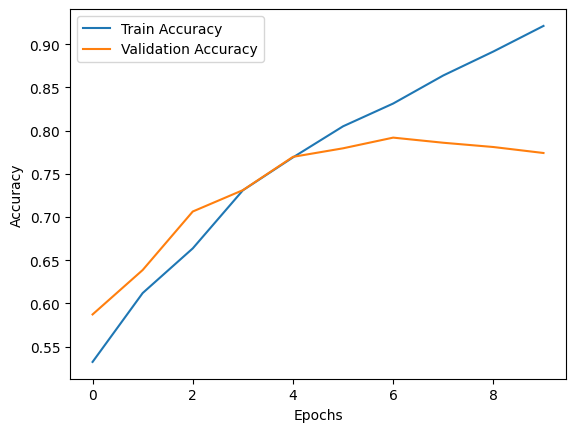

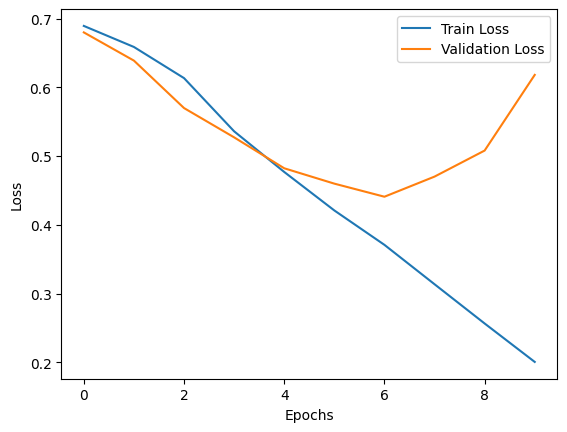

In [16]:

model = Sequential()


model.add(layers.Conv2D(10, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(20, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(40, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(80, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # binary classification

# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)

# Evaluate
loss, acc = model.evaluate(test_ds)
print(f"🔥 Test Accuracy: {acc*100:.2f}%")

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


**Trying out random cat or dog sample for prediction.**

*   0-Cat
*   1-Dog



In [17]:
import cv2

In [18]:
test_img=cv2.imread('/content/cat_and_dog_data/test_set/test_set/dogs/dog.4001.jpg')

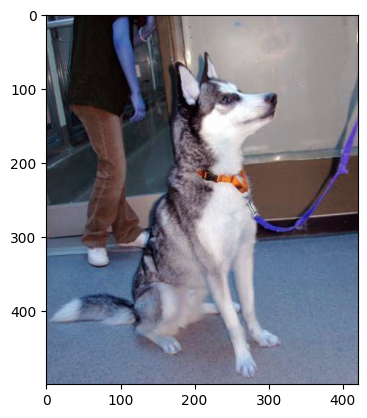

In [19]:
plt.imshow(test_img)

In [20]:
test_img.shape

(499, 421, 3)

In [21]:
test_img=cv2.resize(test_img,(150,150))

In [22]:
test_img.shape

(150, 150, 3)

In [23]:
test_input=test_img.reshape(1,150,150,3)

In [24]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[0.]], dtype=float32)

In [25]:
test1_img=cv2.imread('/content/cat_and_dog_data/test_set/test_set/cats/cat.4001.jpg')

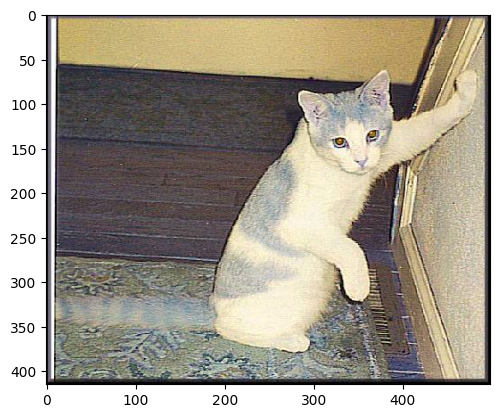

In [26]:
plt.imshow(test1_img)

In [27]:
test1_img.shape

(415, 498, 3)

In [28]:
test1_img=cv2.resize(test_img,(150,150))

In [29]:
test1_img.shape

(150, 150, 3)

In [30]:
test_input=test_img.reshape(1,150,150,3)

In [31]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[0.]], dtype=float32)